In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_dir='C:/Users/Animesh.Parikshya/Documents/IIM Classes/Data sets'
os.chdir(data_dir)

In [4]:
data=pd.read_csv("pollution_agg.csv")

In [5]:
data.dtypes

State        object
NO2 Mean    float64
NO2 AQI     float64
SO2 Mean    float64
SO2 AQI     float64
CO Mean     float64
CO AQI      float64
dtype: object

In [6]:
data_num=data.drop("State",axis=1)

In [7]:
data_num.dtypes

NO2 Mean    float64
NO2 AQI     float64
SO2 Mean    float64
SO2 AQI     float64
CO Mean     float64
CO AQI      float64
dtype: object

In [8]:
data_num.isnull().sum()

NO2 Mean    0
NO2 AQI     0
SO2 Mean    0
SO2 AQI     0
CO Mean     0
CO AQI      0
dtype: int64

In [9]:
def  scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0)    

In [10]:
data_scaled.head()

,NO2 Mean,NO2 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,-0.349635,-0.046352,-0.509376,0.042138,-0.789897,-0.478607
1,0.049808,-0.262306,3.222237,1.403153,0.670806,0.516831
2,1.678022,1.866787,-0.265522,-0.465659,1.136238,1.506556
3,-0.277616,-0.013654,-0.251415,-0.690799,0.663566,0.294395
4,0.540854,0.323806,-0.426269,-0.577565,0.837410,0.842936


In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
data_scaled=np.array(data_scaled)

In [13]:
Z=linkage(data_scaled,method="ward")

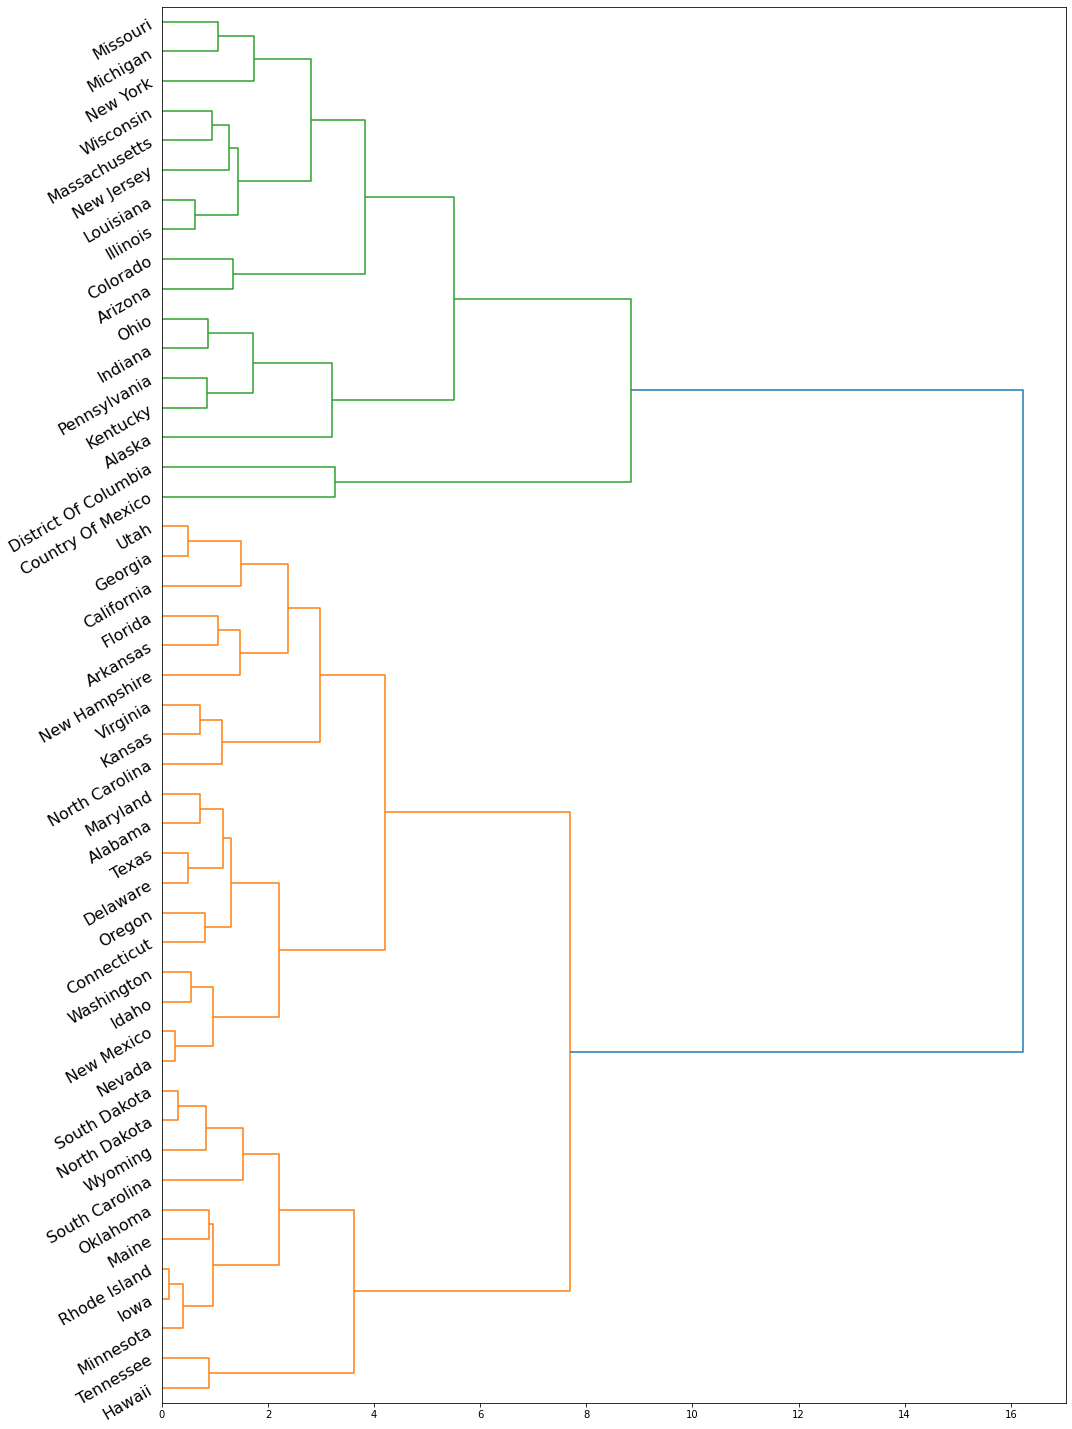

In [14]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(data['State']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()